In [1]:
from ultralytics import YOLO
import cv2
from PIL import Image
from IPython.display import display
import numpy as np
import torch

In [23]:
# Chose Apple Metal Performance Shaders (MPS) if available, otherwise use CPU
# device = 'mps' if torch.backends.mps.is_available() else 'cpu'

# Use temporary CPU for now. There is some issue with MPS
device = 'cpu'

## Load pretrained YOLOv8 model

In [15]:
model = YOLO('yolov8m.pt')

In [16]:
img = cv2.imread('data/dogs.jpg')

In [17]:
results = model(img, device=device)

0: 448x640 3 persons, 4 dogs, 563.4ms
Speed: 1.4ms preprocess, 563.4ms inference, 8.4ms postprocess per image at shape (1, 3, 448, 640)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


## Get first result

In [18]:
result = results[0]

In [19]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [20]:
bboxes = np.array(result.boxes.xyxy.cpu(), dtype=int)
classes = np.array(result.boxes.cls.cpu(), dtype=int)

## Draw bounding boxes

In [21]:
color = (0, 255, 0)
thickness = 2

for cls, bbox in zip(classes, bboxes):
    x1, y1, x2, y2 = bbox
    
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)
    
    result_name = result.names[cls]
    cv2.putText(img, result_name, (x1, y1 - 5), cv2.FONT_HERSHEY_PLAIN, 1, color, thickness)

## Draw the preview

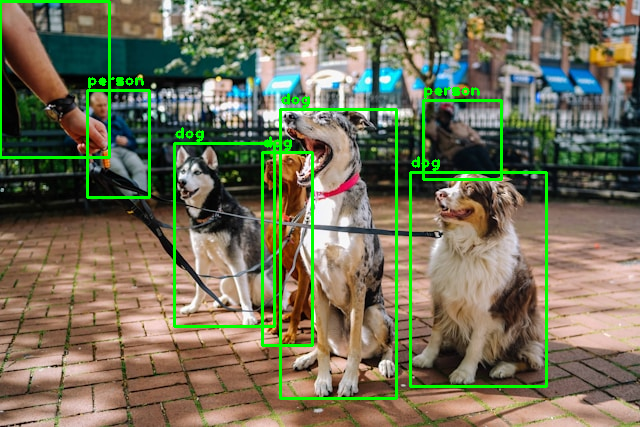

In [22]:
preview = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(preview))
